In [2]:
import numpy as np
import pandas as pd

In [132]:
district = 4

In [133]:
D1_df = pd.read_csv(f"Portland_D{district}.csv") # if you downloaded the file directly, uncomment this and insert the file name
D1_df.head()

,RowNumber,BoxID,BoxPosition,BallotID,PrecinctID,BallotStyleID,PrecinctStyleName,ScanComputerName,Status,Remade,...,"Choice_131_1:City of Portland, Councilor, District 4:3:Number of Winners 3:Write-in-131:NON","Choice_131_1:City of Portland, Councilor, District 4:4:Number of Winners 3:Write-in-131:NON","Choice_131_1:City of Portland, Councilor, District 4:5:Number of Winners 3:Write-in-131:NON","Choice_131_1:City of Portland, Councilor, District 4:6:Number of Winners 3:Write-in-131:NON","Choice_50006_1:City of Portland, Councilor, District 4:1:Number of Winners 3:Uncertified Write In:NON","Choice_50006_1:City of Portland, Councilor, District 4:2:Number of Winners 3:Uncertified Write In:NON","Choice_50006_1:City of Portland, Councilor, District 4:3:Number of Winners 3:Uncertified Write In:NON","Choice_50006_1:City of Portland, Councilor, District 4:4:Number of Winners 3:Uncertified Write In:NON","Choice_50006_1:City of Portland, Councilor, District 4:5:Number of Winners 3:Uncertified Write In:NON","Choice_50006_1:City of Portland, Councilor, District 4:6:Number of Winners 3:Uncertified Write In:NON"
0,1,RCV-0001,1,RCV-0001+10003,26,3,4506-1,ScanStation6,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,RCV-0001,2,RCV-0001+10005,32,1,2804-1,ScanStation6,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,RCV-0001,3,RCV-0001+10007,53,1,3303-1,ScanStation6,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,RCV-0001,4,RCV-0001+10009,22,1,4105-1,ScanStation6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,RCV-0001,5,RCV-0001+10011,53,1,3303-1,ScanStation6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
for col in D1_df.columns:
    print(col)

RowNumber
BoxID
BoxPosition
BallotID
PrecinctID
BallotStyleID
PrecinctStyleName
ScanComputerName
Status
Remade
Choice_88_1:City of Portland, Councilor, District 4:1:Number of Winners 3:Bob Weinstein:NON
Choice_88_1:City of Portland, Councilor, District 4:2:Number of Winners 3:Bob Weinstein:NON
Choice_88_1:City of Portland, Councilor, District 4:3:Number of Winners 3:Bob Weinstein:NON
Choice_88_1:City of Portland, Councilor, District 4:4:Number of Winners 3:Bob Weinstein:NON
Choice_88_1:City of Portland, Councilor, District 4:5:Number of Winners 3:Bob Weinstein:NON
Choice_88_1:City of Portland, Councilor, District 4:6:Number of Winners 3:Bob Weinstein:NON
Choice_89_1:City of Portland, Councilor, District 4:1:Number of Winners 3:Andra Vltavin:NON
Choice_89_1:City of Portland, Councilor, District 4:2:Number of Winners 3:Andra Vltavin:NON
Choice_89_1:City of Portland, Councilor, District 4:3:Number of Winners 3:Andra Vltavin:NON
Choice_89_1:City of Portland, Councilor, District 4:4:Number 

In [135]:
# stores all columns that have ranking information
rank_columns = {i:[col for col in D1_df.columns if f'{i}:Number' in col] for i in range(1,7)}
all_rank_cols = [col for col_list in rank_columns.values() for col in col_list]

In [136]:
D1_voters_df = D1_df[D1_df[all_rank_cols].sum(axis=1) > 0].reset_index(drop=True) # just resets the index of the df

In [137]:
ranking_data = {i:[-1 for _ in range(len(D1_voters_df))] for i in range(1,7)}

for voter_index, row in D1_voters_df.iterrows():
    for rank_position in range(1,7):
        num_votes_cast = row[rank_columns[rank_position]].sum()

        if num_votes_cast == 0:
            cast_vote = ""

        elif num_votes_cast > 1:
            cast_vote = "overvote"

            # here we lost knowledge of who was in the overvote. That's how Portland runs their election
            # system, but it could be interesting to study who is in the overvote!

        else:
            # find candidate name from column
            pd_series = row[rank_columns[rank_position]]
            cast_vote_column_name = pd_series.loc[pd_series == 1].index.tolist()[0]
            cast_vote = cast_vote_column_name.split(":")[-2]

        ranking_data[rank_position][voter_index] = cast_vote

# add the new columns
for rank_position in range(1,7):
    D1_voters_df[f"Rank {rank_position}"] = ranking_data[rank_position]

In [138]:
D1_voters_df.head()

,RowNumber,BoxID,BoxPosition,BallotID,PrecinctID,BallotStyleID,PrecinctStyleName,ScanComputerName,Status,Remade,...,"Choice_50006_1:City of Portland, Councilor, District 4:3:Number of Winners 3:Uncertified Write In:NON","Choice_50006_1:City of Portland, Councilor, District 4:4:Number of Winners 3:Uncertified Write In:NON","Choice_50006_1:City of Portland, Councilor, District 4:5:Number of Winners 3:Uncertified Write In:NON","Choice_50006_1:City of Portland, Councilor, District 4:6:Number of Winners 3:Uncertified Write In:NON",Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6
0,2,RCV-0001,2,RCV-0001+10005,32,1,2804-1,ScanStation6,0,0,...,0,0,0,0,Stanley Penkin,Olivia Clark,,,,
1,3,RCV-0001,3,RCV-0001+10007,53,1,3303-1,ScanStation6,0,0,...,0,0,0,0,Chad Lykins,Sarah Silkie,Lisa Freeman,Eric Zimmerman,Olivia Clark,Tony Morse
2,4,RCV-0001,4,RCV-0001+10009,22,1,4105-1,ScanStation6,0,0,...,0,0,0,0,Olivia Clark,Sarah Silkie,John Toran,Mitch Green,Lisa Freeman,Bob Callahan
3,6,RCV-0001,6,RCV-0001+10013,66,1,4103-1,ScanStation6,0,0,...,0,0,0,0,Mitch Green,Sarah Silkie,Chad Lykins,,,
4,8,RCV-0001,8,RCV-0001+10017,37,1,2806-1,ScanStation6,0,0,...,0,0,0,0,Moses Ross,Sarah Silkie,Bob Weinstein,Eric Zimmerman,Olivia Clark,Lisa Freeman


In [139]:
D1_voters_df[[f"Rank {rank_position}" for rank_position in range(1,7)]].to_csv(f"Portland_D{district}_raw_votekit_format.csv")

In [140]:
from votekit.cvr_loaders import load_csv
print(district)
profile = load_csv(f"Portland_D{district}_raw_votekit_format.csv", rank_cols=[1,2,3,4,5,6])

4


In [141]:
from votekit import matrices
from votekit.utils import mentions

def make_boost(profile, candidates, diagonal_zeros = True):
    total_ballots = len(profile.ballots)
    boost = matrices.boost_matrix(profile, candidates)
    if diagonal_zeros:
        for i, candidate in enumerate(candidates):
            boost[i,i] = 0
    else:
        mentions_dict = mentions(profile)
        for i, candidate in enumerate(candidates):
            boost[i,i] = 1 - mentions_dict[candidate] / total_ballots
    return boost

In [142]:
for i, candidate in enumerate(profile.candidates):
    print(f"{i}: {candidate}")

0: Andra Vltavin
1: Ben Hufford
2: Chad Lykins
3: Moses Ross
4: Olivia Clark
5: Ciatta R Thompson
6: Chris Henry
7: Sarah Silkie
8: Lisa Freeman
9: Michael Trimble
10: Eric Zimmerman
11: Chloe Mason
12: Eli Arnold
13: Mitch Green
14: Tony Morse
15: John Toran
16: Bob Callahan
17: Kelly Doyle
18: Tony Schwartz
19: L Christopher Regis
20: Mike DiNapoli
21: Bob Weinstein
22: Kevin Goldsmith
23: Lee Odell
24: Joseph (Joe) Alfone
25: Patrick Cashman
26: Stanley Penkin
27: Raquel Coyote
28: Brandon Farley
29: Uncertified Write In
30: Write-in-129
31: Write-in-130
32: John J Goldsmith
33: overvote
34: Write-in-131


In [143]:
candidates = list(profile.candidates)
candidates = candidates[:33]
candidates

['Andra Vltavin',
 'Ben Hufford',
 'Chad Lykins',
 'Moses Ross',
 'Olivia Clark',
 'Ciatta R Thompson',
 'Chris Henry',
 'Sarah Silkie',
 'Lisa Freeman',
 'Michael Trimble',
 'Eric Zimmerman',
 'Chloe Mason',
 'Eli Arnold',
 'Mitch Green',
 'Tony Morse',
 'John Toran',
 'Bob Callahan',
 'Kelly Doyle',
 'Tony Schwartz',
 'L Christopher Regis',
 'Mike DiNapoli',
 'Bob Weinstein',
 'Kevin Goldsmith',
 'Lee Odell',
 'Joseph (Joe) Alfone',
 'Patrick Cashman',
 'Stanley Penkin',
 'Raquel Coyote',
 'Brandon Farley',
 'Uncertified Write In',
 'Write-in-129',
 'Write-in-130',
 'John J Goldsmith']

In [144]:
# candidates = candidates[:24]
candidates.remove('Uncertified Write In')
candidates.remove('Write-in-129')
candidates.remove('Write-in-130')

In [145]:
candidates


['Andra Vltavin',
 'Ben Hufford',
 'Chad Lykins',
 'Moses Ross',
 'Olivia Clark',
 'Ciatta R Thompson',
 'Chris Henry',
 'Sarah Silkie',
 'Lisa Freeman',
 'Michael Trimble',
 'Eric Zimmerman',
 'Chloe Mason',
 'Eli Arnold',
 'Mitch Green',
 'Tony Morse',
 'John Toran',
 'Bob Callahan',
 'Kelly Doyle',
 'Tony Schwartz',
 'L Christopher Regis',
 'Mike DiNapoli',
 'Bob Weinstein',
 'Kevin Goldsmith',
 'Lee Odell',
 'Joseph (Joe) Alfone',
 'Patrick Cashman',
 'Stanley Penkin',
 'Raquel Coyote',
 'Brandon Farley',
 'John J Goldsmith']

In [146]:
boost = make_boost(profile, candidates)

In [147]:
candidate_distance_matrix = matrices.candidate.candidate_distance_matrix(profile, candidates)

In [148]:
comentions_matrix = matrices.candidate.comentions_matrix(profile, candidates)

In [149]:
import matplotlib.pyplot as plt

def show_matrix(M,title=None):
    fig, ax = plt.subplots()
    if title:
        plt.title(title)
    img = ax.imshow(M)
    fig.colorbar(img)
    ax.set_aspect('auto')
    plt.show()

['Andra Vltavin', 'Ben Hufford', 'Chad Lykins', 'Moses Ross', 'Olivia Clark', 'Ciatta R Thompson', 'Chris Henry', 'Sarah Silkie', 'Lisa Freeman', 'Michael Trimble', 'Eric Zimmerman', 'Chloe Mason', 'Eli Arnold', 'Mitch Green', 'Tony Morse', 'John Toran', 'Bob Callahan', 'Kelly Doyle', 'Tony Schwartz', 'L Christopher Regis', 'Mike DiNapoli', 'Bob Weinstein', 'Kevin Goldsmith', 'Lee Odell', 'Joseph (Joe) Alfone', 'Patrick Cashman', 'Stanley Penkin', 'Raquel Coyote', 'Brandon Farley', 'John J Goldsmith']


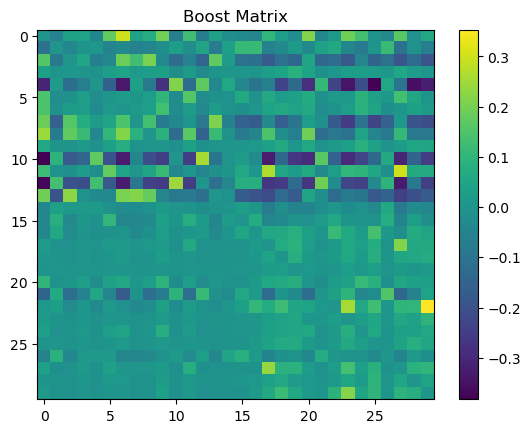

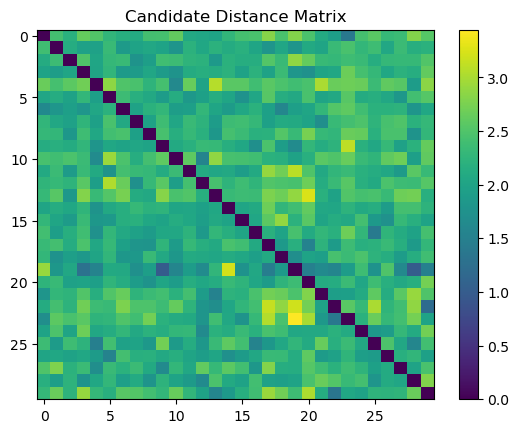

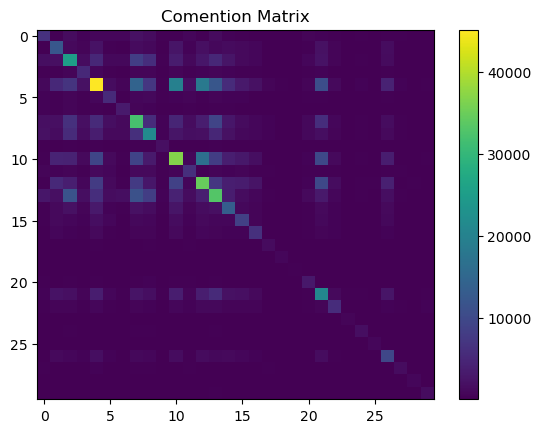

In [150]:
print(candidates)
show_matrix(boost, "Boost Matrix")
show_matrix(candidate_distance_matrix, "Candidate Distance Matrix")
show_matrix(comentions_matrix, "Comention Matrix")

In [153]:
to_save = dict(
    profile=profile,
    boost=boost,
    distance=candidate_distance_matrix,
    comentions=comentions_matrix,
    candidates=candidates
)

In [154]:
from pickle import dump, load

with open(f"data/Portland_D{district}.pkl", "wb") as f:
    dump(to_save, f)